In [1]:
# import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# configure API key

quandl.ApiConfig.api_key = 'c68u1gf7JVMqoWKkN1AT'

In [3]:
# Euro area in the total loan outstanding amounts of the area aggregate and of each bank in the 
#total loan outstanding amount of the BLS banks sample

data = quandl.get('ECB/BLS_Q_U2_ALL_TOIL_B_TCR_F3_ST_S_BWSD')

In [4]:
data.head()

,Unit described in title
Date,
2010-03-31,1.10
2010-06-30,0.74
2010-09-30,0.78
2010-12-31,0.46
2011-03-31,0.45


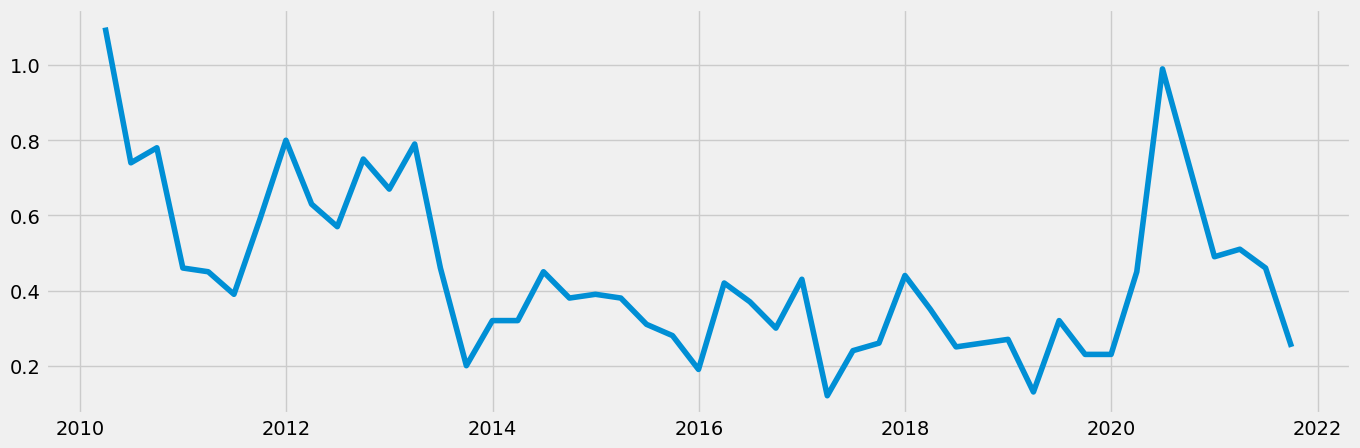

In [5]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [6]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [7]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

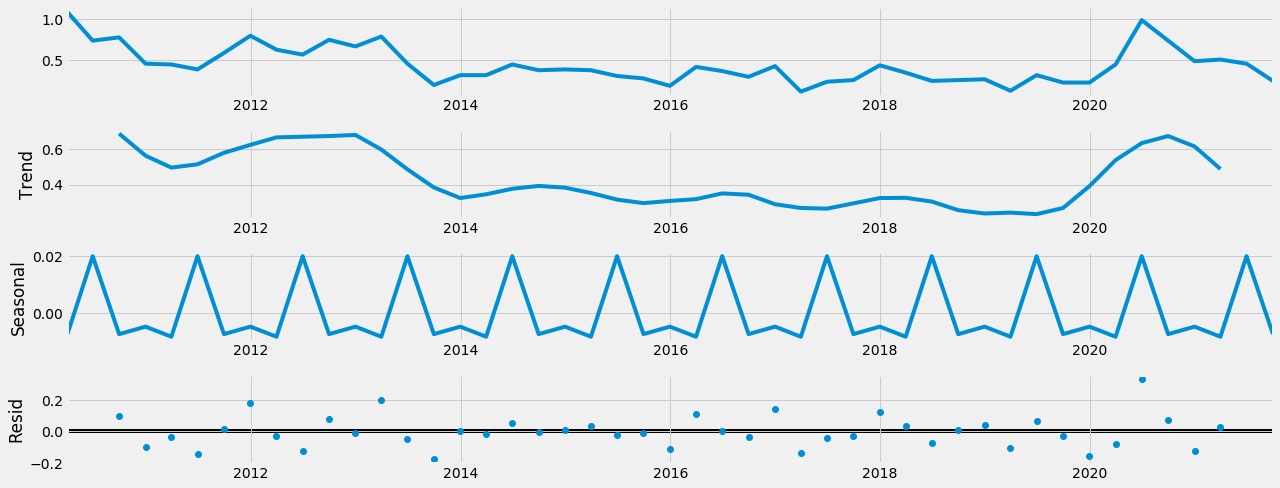

In [8]:
# Plot the separate components

decomposition.plot()
plt.show()

### Based off of these results, there isn't a linear pattern being shown. This is a non-linear pattern. 

In [10]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Unit described in title'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.968371
p-value                         0.001585
Number of Lags Used             0.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


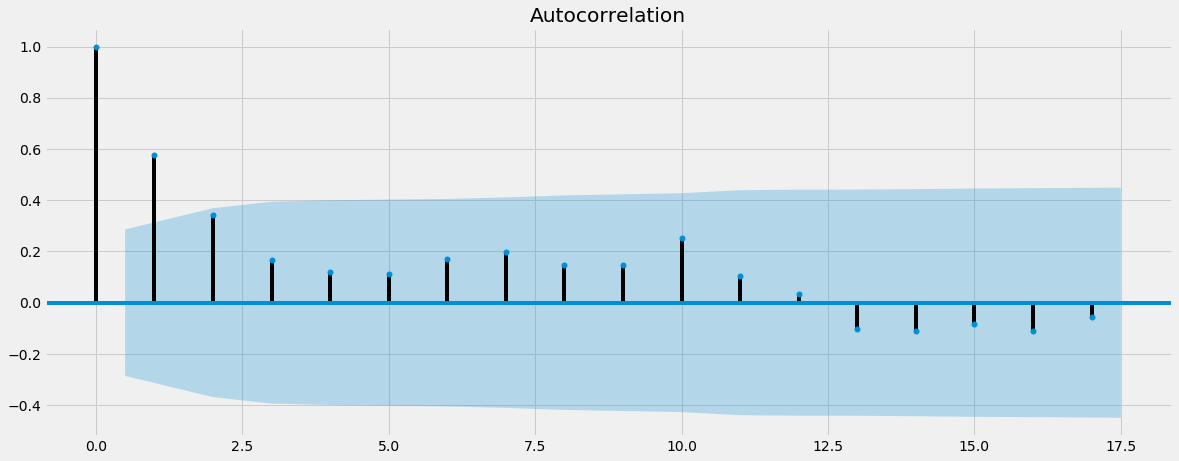

In [11]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

### This autocorrelation shows that there is a stationary time series throughout the data. 